# Introduction

Lung cancer remains the leading cause of cancer-related mortality globally, accounting for numerous deaths each year. Despite advancements in medical technology, early detection of lung cancer, which significantly improves survival rates, is still primarily reliant on traditional methods such as X-rays, CT scans, and invasive biopsies. These methods, while effective, have limitations including cost, accessibility, and the need for specialized equipment and personnel.

This project is motivated by the need for alternative diagnostic approaches that are less invasive and more accessible. By leveraging a dataset titled "Lung Cancer Prediction" from Kaggle, this study aims to develop a predictive model that can determine the likelihood of a patient being diagnosed with lung cancer at three different risk levels: Low, Medium, and High. The dataset encompasses individuals monitored over an average span of six years, categorized into groups based on their exposure to high or low levels of air pollution. 

Our objective is to identify key risk factors such as air pollution, alcohol consumption, and smoking habits to explore their potential links to lung cancer. Through this analysis, we hope to contribute to the early detection and effective treatment of lung cancer, thereby increasing patient survival rates and reducing the burden on healthcare systems.


# Exploratory Analysis 

This section of the report outlines our approach to exploring the "Lung Cancer Prediction" dataset. Our primary goal is to identify potential risk factors associated with lung cancer and to understand the data's characteristics which might influence the model's predictions.

## 1. Data Loading and Initial Inspection

In [3]:
import pandas as pd
import numpy as np
import os

# Load the dataset
curr_dir = os.getcwd()
f_path = os.path.join(curr_dir, 'data', 'cancer patient data sets.csv')
df = pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


The initial step involves loading the dataset using pandas to examine the structure and type of data, which is essential for understanding the dataset's characteristics. The initial inspection revealed several attributes such as age, gender, air pollution levels, alcohol use, and genetic risks, among others. This step is crucial as it sets the foundation for subsequent data handling and analysis.

## 2. Data Cleaning


In [4]:
df = df.drop('index', axis=1)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Data cleaning is a critical process to prepare the dataset for analysis. It involved removing irrelevant columns like 'index', which do not contribute to the analysis. Additionally, we checked for missing values across the dataset. The pandas function df.info() indicated no missing values, which simplifies the preprocessing steps. The cleaning process ensures that the dataset is neat and usable for accurate analysis.

### Unique Values and Descriptive Statistics

In [5]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    if column != "Patient Id":
        print(f"Unique values for column '{column}': {values}")

Unique values for column 'Age': [33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
Unique values for column 'Gender': [1 2]
Unique values for column 'Air Pollution': [2 3 4 7 6 5 1 8]
Unique values for column 'Alcohol use': [4 1 5 7 8 3 6 2]
Unique values for column 'Dust Allergy': [5 6 7 4 2 8 1 3]
Unique values for column 'OccuPational Hazards': [4 3 5 7 2 6 8 1]
Unique values for column 'Genetic Risk': [3 4 5 6 7 2 1]
Unique values for column 'chronic Lung Disease': [2 4 7 6 3 5 1]
Unique values for column 'Balanced Diet': [2 6 7 4 5 3 1]
Unique values for column 'Obesity': [4 2 7 3 5 6 1]
Unique values for column 'Smoking': [3 2 7 8 1 6 5 4]
Unique values for column 'Passive Smoker': [2 4 3 7 6 8 5 1]
Unique values for column 'Chest Pain': [2 4 7 3 6 5 9 8 1]
Unique values for column 'Coughing of Blood': [4 3 8 9 1 5 7 6 2]
Unique values for column 'Fatigue': [3 1 8 4 5 9 2 6]
Unique values for column 'Weight L

By examining the unique values for each column, we gained insights into the range of variables like 'Age', 'Gender', and lifestyle-related factors ('Smoking', 'Alcohol use'). This step confirms the absence of any anomalous entries and helps understand the diversity within the dataset.

In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


We removed columns that are not relevant to our analysis to simplify the dataset.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution Analysis

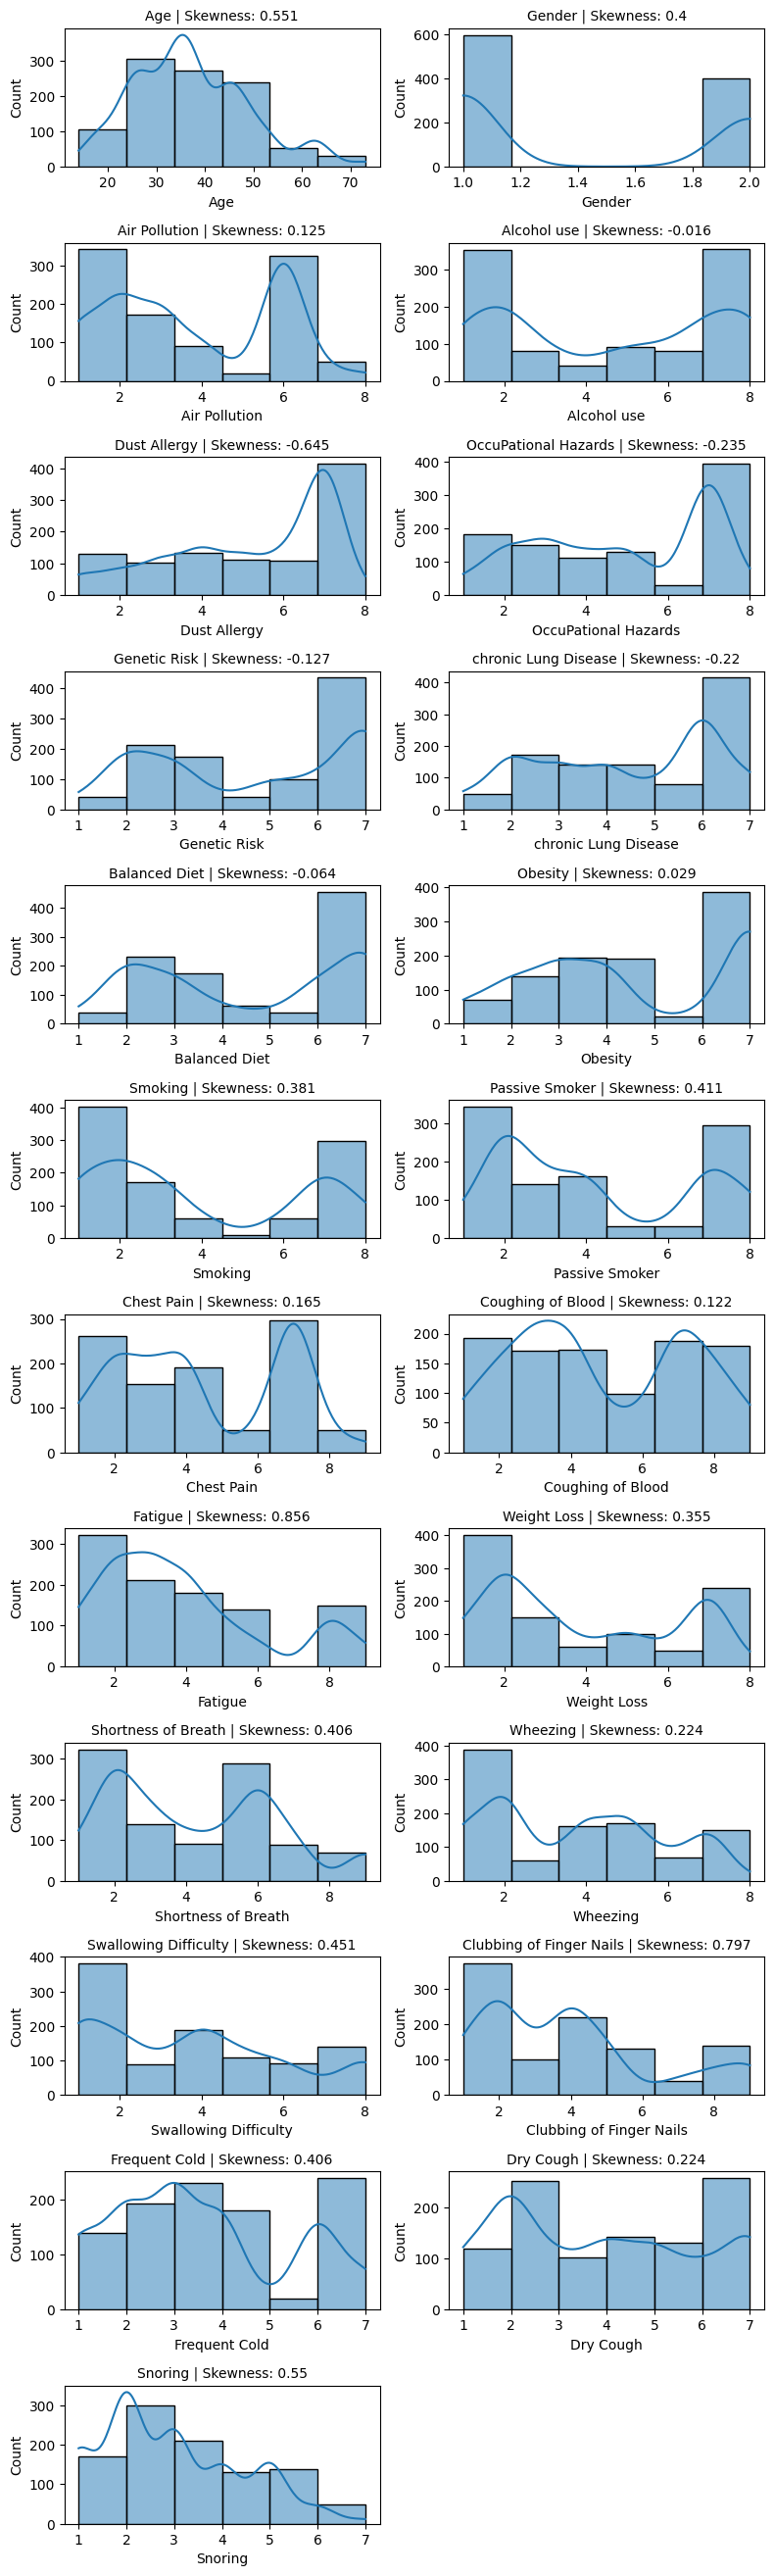

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove patient id and label
features = df.drop(["Patient Id","Level"], axis=1)
plt.figure(figsize=(8, 25*2))

# Look at the distribution for each feature and see if there is any feature with abs(skewness)>=1. If so, have to do some sort of transformation such as log transformation 
for index, feature in enumerate(features, 1):
    plt.subplot(23, 2, index)
    sns.histplot(df[feature], kde=True,bins=6)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 3)}",fontsize=10)
 
plt.tight_layout()
plt.show()

*Figure X*  _Distribution of skewness for all the different attributes. The x-axis represents the attributes, and the y-axis represents count._

The histogram and skewness analysis for each feature serve to illuminate the underlying structure of our data and to guide our preprocessing strategy. The analysis specifically helps in two primary ways:

1. **Identifying Data Distributions**: The histograms visually present the distribution of each variable. Understanding the shape and spread of the data is crucial for recognizing patterns, detecting outliers, and identifying features with significant variances. These insights are important when considering the assumptions of our future predictive models.

2. **Assessing Skewness**: Skewness quantifies the asymmetry of the data distribution. This measure is particularly relevant because many machine learning algorithms perform best with normally distributed data. Detecting skewness informs us whether a transformation may be necessary to achieve better modeling results.

From the analysis provided, we noticed that:

- **Age** has a moderate right skew, indicating a younger population within the dataset. This demographic tilt could affect how age-related factors are interpreted in risk prediction.
- **Dust Allergy** has a noticeable left skew, meaning there are more individuals in the dataset with high ratings of dust allergy. This could be an important predictor if the skew indicates a link between dust allergy and lung cancer risk.
- Most other variables, including **Air Pollution**, **Alcohol use**, and **Obesity**, exhibit skewness close to zero, suggesting a fairly symmetrical distribution. Their distributions do not show extreme skewness, and thus, they may not require data transformation before being used in our predictive models.

Notably, **Genetic Risk** and **Occupational Hazards** show only slight negative skewness, suggesting that while there are individuals at higher risk, the data does not lean excessively in this direction.

Overall, the analysis revealed that the dataset is relatively well-behaved with only a few features showing moderate skewness. Therefore, it is likely that most features can be used without transformation in the modeling phase, simplifying the data preparation process. However, it should be noted that during our baseline testing, features like Age and Dust Allergy were not normalized, as initial evaluations indicated that scaling these features was not necessary to achieve accurate risk predictions without biasing the model.

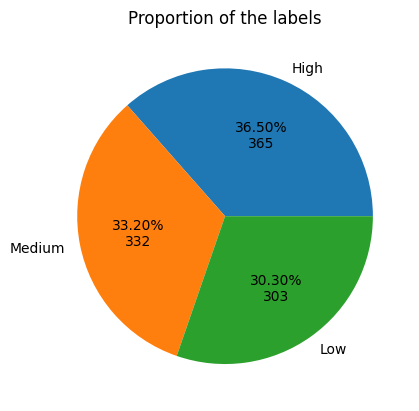

In [8]:
plt.figure() 
Level_lst=df['Level'].value_counts()
labels = Level_lst.index.tolist()
counts = Level_lst.values.tolist()
plt.pie(counts, labels=labels, autopct=lambda x: '{:.2f}%\n{:,.0f}'.format(x, x * sum(Level_lst /100)))
plt.title(f'Proportion of the labels')
plt.show()

*Figure X*  _Proportion of Labels by Category. This pie chart illustrates the distribution of labels across three categories: High, Medium, and Low._

In assessing the balance of our target variable, the 'Level' of lung cancer risk, the dataset exhibits a fairly even distribution across the three categories: Low, Medium, and High risk. Specifically, 30.30% of the cases are categorized as Low risk, 33.20% as Medium risk, and 36.50% as High risk. This relatively uniform distribution is advantageous for predictive modeling as it suggests that our dataset is not heavily skewed towards any single class, which could lead to model bias.

From a modeling perspective, this distribution means that we can proceed with standard machine learning algorithms without the immediate need for techniques that handle imbalanced data, such as resampling or specialized cost functions. However, the slight over-representation of High-risk cases may still warrant attention during model training and evaluation to ensure that predictions are not unduly biased towards this category.

Overall, the proportionate representation of each risk level in our dataset provides a solid foundation for building and evaluating a model that aims to predict the risk of lung cancer with balanced accuracy across all risk levels.

### 3.2 Correlation Analysis

<Axes: >

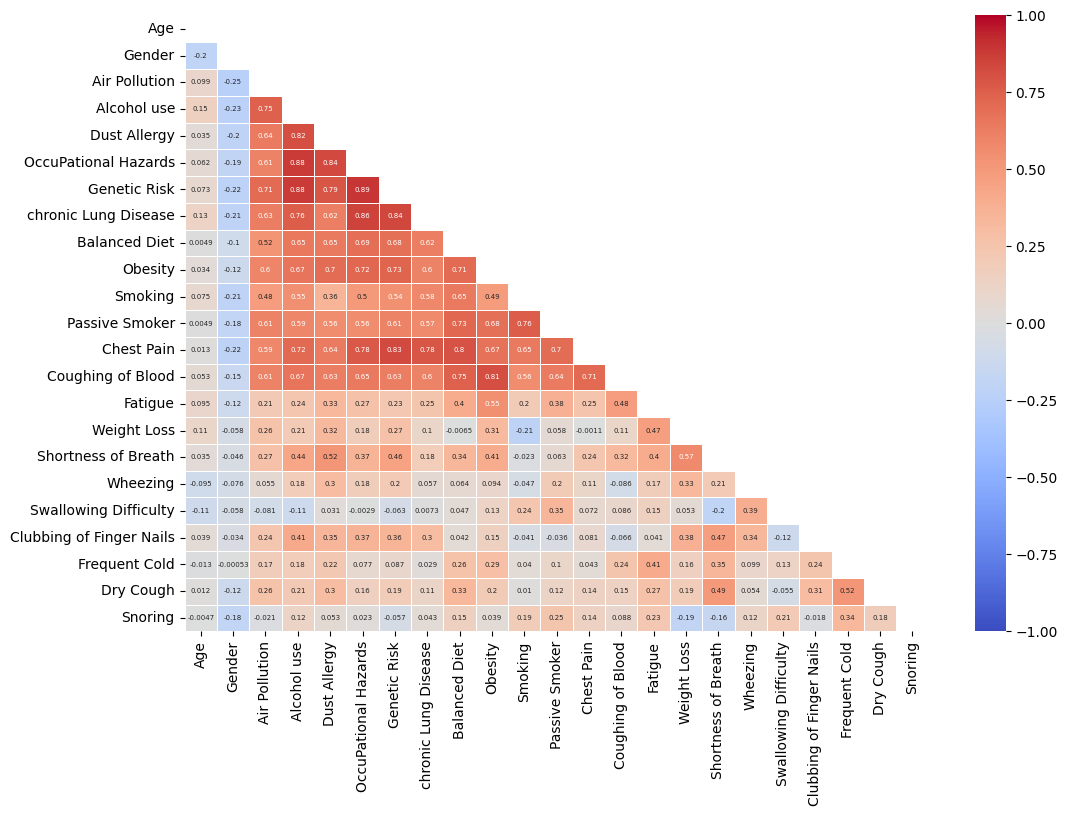

In [9]:
plt.figure(figsize=(12, 8)) 
cmap=sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(features.corr()))
sns.heatmap(features.corr(),vmin=-1, vmax=1,annot=True,cmap=cmap,mask=mask, linewidths=0.5, annot_kws={"size": 5})

*Figure X*  _Correlation Heatmap of Lung Cancer Risk Factors. This heatmap depicts the correlation between the different factors influencing lung cancer risk._


In our exploratory data analysis, the correlation heatmap provided crucial insights into the factors influencing lung cancer risk. Notably, strong positive correlations were identified, such as between 'Genetic Risk' and 'Occupational Hazards' with a correlation value of 0.893. This suggests a significant interaction, possibly reflecting the combined influence of genetic predispositions and environmental exposures on lung cancer susceptibility.

Other significant correlations include 'Occupational Hazards' and 'Alcohol use' (0.878), 'Alcohol use' and 'Genetic Risk' (0.877), as well as 'Chronic Lung Disease' with both 'Occupational Hazards' (0.858) and 'Genetic Risk' (0.836). These findings highlight the compound nature of lung cancer risk, where lifestyle choices, occupational exposures, and genetic factors are intricately linked.

Conversely, some factors like 'Age' and 'Gender' showed minimal correlation with other variables, indicating their potential to independently modulate lung cancer risk.

While these correlations enhance the predictive power of our model, they also raise concerns about multicollinearity, which could skew the results by overestimating or underestimating the effects of certain variables. This necessitates careful feature selection and possibly employing dimensionality reduction techniques to maintain the integrity of our model.

It's important to note that correlation does not confirm causation. The observed relationships warrant further analysis using advanced statistical or machine learning methods to distinguish causative factors from those merely associated.

The absence of perfect correlations in the heatmap illustrates the complex interplay among the variables, underscoring the need for a sophisticated approach in model construction that accounts for these interactions. This will be further explored in our [Feature Selection](#feature-selection) section.

In conclusion, the correlation analysis underscores the complex interrelationships among the risk factors studied, emphasizing the need to consider these connections when developing a predictive model for lung cancer risk.

Below is a table that lists the correlations that have correlation values greater than 0.7 from the most to the least correlated, sorted in descending order.

In [10]:
cor_val = features.corr().unstack()
cor_val = cor_val.sort_values(ascending=False)
cor_val = cor_val[(abs(cor_val) != 1) & (abs(cor_val) > 0.7)]  # Filter for correlation values greater than 0.7
unique_pairs = {}
for pair in cor_val.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs[(pair[0], pair[1])] = cor_val[pair]
data = {'Pair': list(unique_pairs.keys()), 'Value': list(unique_pairs.values())}
df_unique_pairs = pd.DataFrame(data)
df_unique_pairs

,Pair,Value
0,"(Genetic Risk, OccuPational Hazards)",0.893049
1,"(OccuPational Hazards, Alcohol use)",0.878786
2,"(Alcohol use, Genetic Risk)",0.877210
3,"(chronic Lung Disease, OccuPational Hazards)",0.858284
4,"(chronic Lung Disease, Genetic Risk)",0.836231
5,"(Dust Allergy, OccuPational Hazards)",0.835860
6,"(Chest Pain, Genetic Risk)",0.831751
7,"(Alcohol use, Dust Allergy)",0.818644
8,"(Coughing of Blood, Obesity)",0.814805
9,"(Balanced Diet, Chest Pain)",0.798207


### Overall Conclusion for the EDA

The exploratory data analysis (EDA) conducted provides comprehensive insights into the dataset. The distribution analysis, including histograms and skewness, revealed that most features are relatively normally distributed with only a few showing moderate skewness, suggesting that extensive data transformation may not be necessary. The class distribution of the target variable is reasonably balanced, which bodes well for developing a model that doesn't require extensive rebalancing techniques. The correlation analysis highlighted several highly correlated features, which could be indicative of underlying factors that contribute to lung cancer risk or suggest potential redundancy within the data. 

The correlation heatmap, in particular, has elucidated complex interdependencies among the variables, pointing towards both potential multicollinearity concerns as well as interactions that may be significant in predicting lung cancer risk. The EDA has laid a solid foundation for informed feature selection and model construction. It has identified the need for possible dimensionality reduction or feature engineering to address multicollinearity and has set the stage for the application of predictive modeling techniques that can handle the complex relationships inherent in the data.

In conclusion, the EDA suggests that the dataset contains rich and relevant information for building a predictive model, with a depth of variables that reflect both individual and environmental factors associated with lung cancer risk. The subsequent sections will explain how we leveraged these insights to build a robust model capable of making accurate predictions.